### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [67]:
data = pd.read_csv('data/coupons.csv')

In [68]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [70]:
# Entire data

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## Analysis of missing data

From the above count of null values, 'car' has 12,576 (out of the total 12,684 rows) null values and is best ignored as data unavailable. 

The rest Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 are missing about 1% to 2% of data where it should be safe to replace them by zeros. 

We will now inspect the values for the data elements listed under "Data Description". For now we will leave non numeric data like education and occupation as is and consider having numeric equivalents if needed during visualization.

In [71]:
# Age

data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [72]:
# Age has two non-numeric values 'below21' and '50plus'. I will convert this to numeric by replacing 'below21' to 20
# because 21 is a cut off age for consuming alcohol. I will replace '50plus' to 51 and call the new column age_numeric

data['age_num'] = pd.Series([x.replace("50plus", "51")\
                       .replace("below21", "20")\
                for x in data['age']], data['age'].index)
data['age_num'] = pd.to_numeric(data['age_num'])
data['age_num'].value_counts()

21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
20     547
Name: age_num, dtype: int64

In [73]:
# Income

data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [74]:
# I will now take the approach of using the midpoint of each range to record the income data and convert it to numeric

# The first step would be eleminate the words from the range and remove the $ signe from the ranges

data['income_num'] = pd.Series([x.replace("$100000 or More", "100000")\
                       .replace("Less than $12500", "12500")\
                       .replace('$','')\
                for x in data['income']], data['income'].index)

# now replace the range with it's mid point

def replaceWithMidPoint(rangenums, separator):
    lowerUpper = rangenums.split(separator)
    retVal = lowerUpper[0]
    if (len(lowerUpper) > 1):
        retVal = np.trunc(int(lowerUpper[1]) + int(lowerUpper[0])/2)
    return int(retVal)

data['income_num'] = data['income_num'].apply(lambda row : replaceWithMidPoint(row, ' - '))

data['income_num'].value_counts()

49999     2013
31249     1831
68749     1805
100000    1736
87499     1659
12500     1042
143749     895
124999     857
106249     846
Name: income_num, dtype: int64

In [75]:
# Bar

data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [76]:
# Since Bar is actuall a numeric count of how many times the user goes to the bar, I will convert this from
# string range to numeric taking the mid point of ranges, replacing never to zero, less than 1 to 1 and 

# replace null values with 'null'

def replaceCountRange(series):
    retSeries = series.replace(np.nan, 'null', regex=True)

    retSeries = pd.Series([str(x).replace("never", "0")\
                       .replace("null", "0")\
                       .replace("less1", "1")\
                       .replace('1~3','2')\
                       .replace('4~8','6')\
                       .replace('gt8','8')\
               for x in retSeries], retSeries.index)

    retSeries = pd.to_numeric(retSeries)
    return retSeries

data['Bar_num'] = replaceCountRange(data['Bar'])
data['Bar_num'].value_counts()

0    5304
1    3482
2    2473
6    1076
8     349
Name: Bar_num, dtype: int64

In [77]:
# CarryAway

data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [78]:
# Use the same treatment for CarryAway as we did for Bar

data['Carry_num'] = replaceCountRange(data['CarryAway'])
data['Carry_num'].value_counts()

2    4672
6    4258
1    1856
8    1594
0     304
Name: Carry_num, dtype: int64

In [79]:
# CoffeeHouse

data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [80]:
# Apply the same data transformation for CoffeeHouse as for Bar and CarryAway

data['Coffee_num'] = replaceCountRange(data['CoffeeHouse'])
data['Coffee_num'].value_counts()

1    3385
2    3225
0    3179
6    1784
8    1111
Name: Coffee_num, dtype: int64

In [81]:
# RestaurantLessThan20

data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [82]:
# Apply the same data transformation for RestaurantLessThan20

data['RestLess20_num'] = replaceCountRange(data['RestaurantLessThan20'])
data['RestLess20_num'].value_counts()

2    5376
6    3580
1    2093
8    1285
0     350
Name: RestLess20_num, dtype: int64

In [83]:
# Restaurant20To50

data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [84]:
# Apply the same data transformation for Restaurant20To50

data['Rest20to50_num'] = replaceCountRange(data['Restaurant20To50'])
data['Rest20to50_num'].value_counts()

1    6077
2    3290
0    2325
6     728
8     264
Name: Rest20to50_num, dtype: int64

In [86]:
data['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [87]:
data['toCoupon_GEQ15min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

In [88]:
data['toCoupon_GEQ25min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [89]:
data['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

In [90]:
data['direction_opp'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [93]:
data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [156]:
data['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

<Axes: >

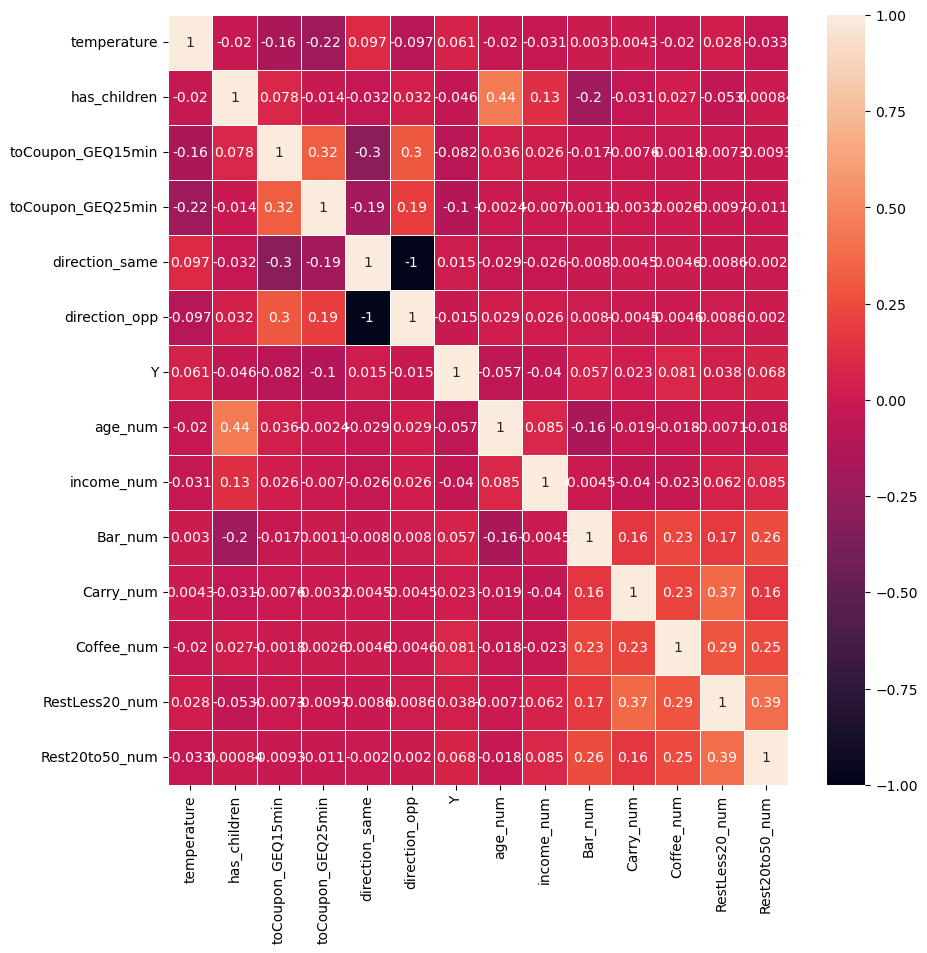

In [124]:
# Now try a heat map to see if there are strong correlations between Y and any other numeric features

heatmap_df = data[['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y', 'age_num', 'income_num', 'Bar_num', 'Carry_num', 'Coffee_num', 'RestLess20_num', 'Rest20to50_num']]
ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(heatmap_df.corr(), annot=True, linewidths=.5)

# The above heat map shows no striking correlation between 'Y' and one other numeric features - all positive and negative
# correlations are less than 0.1. So we will need to pick a subset of features to look for relationships. 

3. Decide what to do about your missing data -- drop, replace, other...

## Action on missing data

In summary we replaced missing values to mean 'never' for features Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50.

We will ignore 'car' for this analysis as most of it's values are missing.

4. What proportion of the total observations chose to accept the coupon? 



In [92]:
percentAccept = data[data['Y'] == 1]['Y'].count() / data['Y'].count() * 100
print(percentAccept)

56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

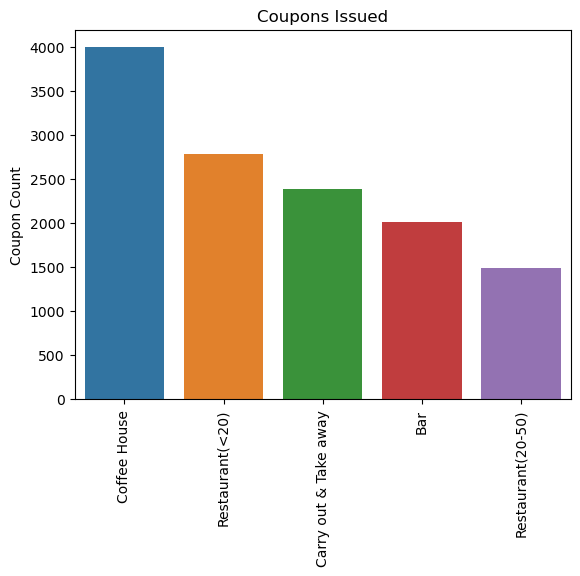

In [320]:
def valueCountBarPlot(series, ylabel, title):
    sns.barplot(x=series.value_counts().index, y=series.value_counts())
    plt.xticks(rotation=90)
    plt.ylabel(ylabel)
    plt.title(title)
    
valueCountBarPlot(data.coupon, "Coupon Count", "Coupons Issued")

6. Use a histogram to visualize the temperature column.

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

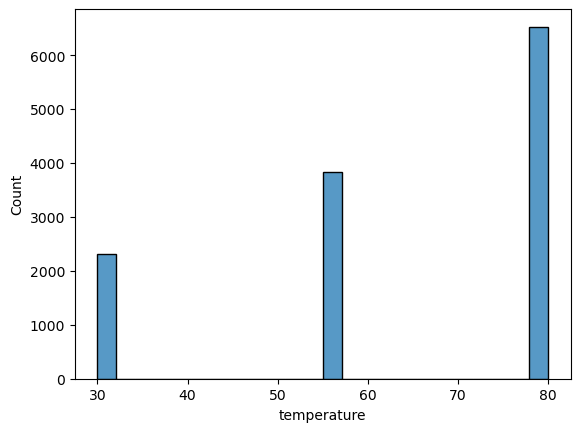

In [109]:
sns.histplot(data=data, x='temperature')
data['temperature'].value_counts()

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [315]:
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [304]:
data_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [305]:
data_bar['Y'].value_counts()

0    1190
1     827
Name: Y, dtype: int64

In [306]:
percentAccept = data_bar[data_bar['Y'] == 1]['Y'].count() / data_bar['Y'].count() * 100
print(percentAccept)

41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [307]:
# Since we are going to study accepted coupons, create a data frame with just accepted bar coupons 

data_bar_accept = data_bar[data_bar['Y']==1]

In [308]:
# utility function to count series with 0s and 1s
                                         
def countZeroOneSeries(series, oneMsg, zeroMsg):
    numOne = series.value_counts()[1]
    numZero = series.value_counts()[0]

    print("Number of", oneMsg, " - ", numOne)
    print("Number of", zeroMsg, " - ", numZero)
    print("Percent -", numOne / (numOne + numZero) * 100)
    
    return

# utility function to plot count of series with 0s and 1s
                                         
def drawBarPlot(series, xlabelList, ylabel, title):
    fig = sns.barplot(x=series.value_counts().index, y=series.value_counts())

    plt.title(title)
    plt.ylabel(ylabel)
    fig.set_xticklabels(xlabelList)
    
    return


In [311]:
# acceptance rate between those who went to a bar 3 or fewer times a month to those who went more

data_bar_accept = data_bar_accept.assign(barless3=np.where(data_bar_accept['Bar'].isin(['1~3', 'never', 'less1']),\
                                                           1, 0))

countZeroOneSeries(data_bar_accept['barless3'], \
       "drivers vising bar less than 3 times who accepted coupon",\
                  "all other drivers who accepted")

Number of drivers vising bar less than 3 times who accepted coupon  -  666
Number of all other drivers who accepted  -  161
Percent - 80.53204353083434


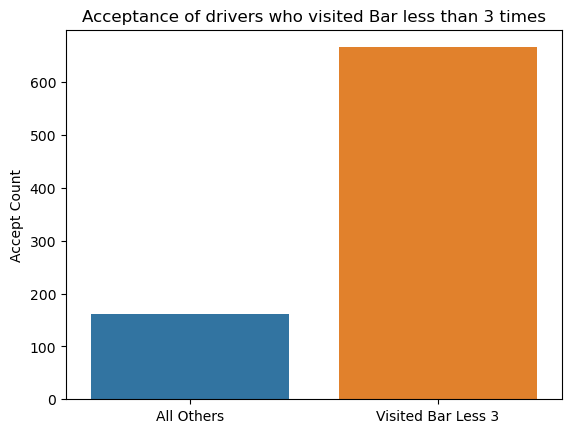

In [312]:
drawBarPlot(data_bar_accept.barless3, ['All Others', 'Visited Bar Less 3'], "Accept Count", \
            "Acceptance of drivers who visited Bar less than 3 times")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [309]:
# drivers who go to a bar more than once a month and are over the age of 25

data_bar_accept = data_bar_accept.assign(above25Gt1=np.where(((data_bar_accept['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                     & (data_bar_accept['age_num'] > 25)), 1, 0))

In [261]:
countZeroOneSeries(data_bar_accept['above25Gt1'], \
       "drivers vising bar more than once above age 25 who accepted coupon",\
                  "all other drivers who accepted")

Number of drivers vising bar more than once above age 25 who accepted coupon  -  292
Number of all other drivers who accepted  -  535
Percent - 35.30834340991535


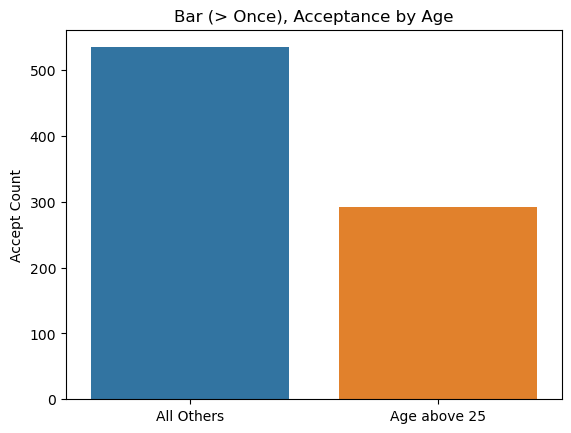

In [291]:
drawBarPlot(data_bar_accept.above25Gt1, ['All Others', 'Age above 25'], "Accept Count", \
            "Bar (> Once), Acceptance by Age")

# The bar plot shows that drivers aged over 25 just form 35% of others who accepted bar coupons

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [157]:
data_bar['occupation'].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [272]:
noKidsMoreOnceIndus = data_bar[(data_bar['Y'] == 1) & (data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                & (data_bar['passanger'] != 'Kid(s)') \
                                & (data_bar['occupation'] == 'Farming Fishing & Forestry')]\
                              [['Bar', 'passanger', 'occupation', 'Y']]
countNoKidsMoreOnceIndus = noKidsMoreOnceIndus['Y'].count() / data_bar[data_bar['Y'] == 1]['Y'].count() * 100
print(countNoKidsMoreOnceIndus)

0.0


In [257]:
data_bar_accept = data_bar_accept.assign(noKidsMoreOnceFarming=np.where(((data_bar_accept['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                & (data_bar_accept['passanger'] != 'Kid(s)') \
                                & (data_bar_accept['occupation'] == 'Farming Fishing & Forestry')), 1, 0))

print("Number of drivers who accepted coupons in this category - ",\
         data_bar_accept[data_bar_accept['noKidsMoreOnceFarming'] == 1]['noKidsMoreOnceFarming'].count())

Number of drivers who accepted coupons in this category -  0


In [238]:
data_bar[data_bar['occupation'] == 'Farming Fishing & Forestry'][['passanger', 'Bar']]

,passanger,Bar
8431,Kid(s),never
8432,Kid(s),never
8438,Friend(s),never
8445,Alone,never
9558,Alone,less1
9565,Kid(s),less1
9568,Alone,less1
9571,Alone,less1
9574,Alone,less1


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [271]:
data_bar['maritalStatus'].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [273]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

noKidsMoreOnceNotWidow = data_bar[(data_bar['Y'] == 1) & (data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                & (data_bar['passanger'] != 'Kid(s)') \
                                & (data_bar['maritalStatus'] != 'Widowed')]\
                                [['Bar', 'passanger', 'maritalStatus', 'Y']]
countnoKidsMoreOnceNotWidow = noKidsMoreOnceNotWidow['Y'].count() / data_bar[data_bar['Y'] == 1]['Y'].count() * 100
print(countnoKidsMoreOnceNotWidow)

47.521160822249094


In [265]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

data_bar_accept = data_bar_accept.assign(noKidsMoreOnceNoWidow=np.where((\
                                (data_bar_accept['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                & (data_bar_accept['passanger'] != 'Kid(s)') \
                                & (data_bar_accept['maritalStatus'] != 'Widowed')), 1, 0))

countZeroOneSeries(data_bar_accept['noKidsMoreOnceNoWidow'], \
       "drivers vising bar more than once, not widowed, with no kid passengers who accepted coupon",\
                  "all other drivers who accepted")

Number of drivers vising bar more than once, not widowed, with no kid passengers who accepted coupon  -  393
Number of all other drivers who accepted  -  434
Percent - 47.521160822249094


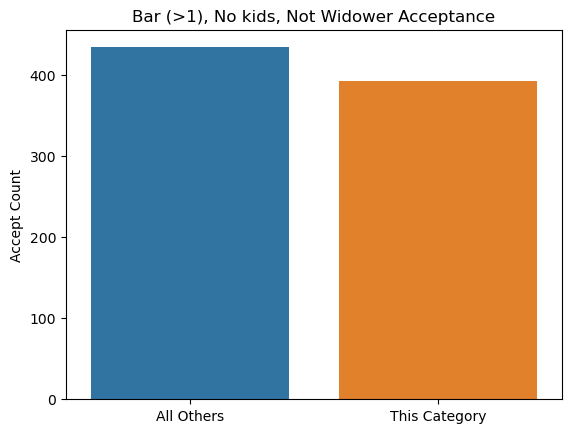

In [282]:
drawBarPlot(data_bar_accept.noKidsMoreOnceNoWidow, ['All Others', 'This Category'], "Accept Count", \
            "Bar (>1), No kids, Not Widower Acceptance")

In [287]:
# go to bars more than once a month and are under the age of 30

below30MoreOnce = data_bar[(data_bar['Y'] == 1) & (data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                & (data_bar['age_num'] < 30)][['Bar', 'age_num', 'Y']]
countBelow30MoreOnce = below30MoreOnce['Y'].count() / data_bar[data_bar['Y'] == 1]['Y'].count() * 100
print(countBelow30MoreOnce)

30.10882708585248


In [284]:
# go to bars more than once a month and are under the age of 30

data_bar_accept = data_bar_accept.assign(below30MoreOnce=np.where((\
                                (data_bar_accept['Bar'].isin(['1~3', '4~8', 'gt8'])) \
                                & (data_bar_accept['age_num'] < 30)), 1, 0))

countZeroOneSeries(data_bar_accept['below30MoreOnce'], \
       "drivers vising bar more than once, below 30 years of age who accepted coupon",\
                  "all other drivers who accepted")

Number of drivers vising bar more than once, below 30 years of age who accepted coupon  -  249
Number of all other drivers who accepted  -  578
Percent - 30.10882708585248


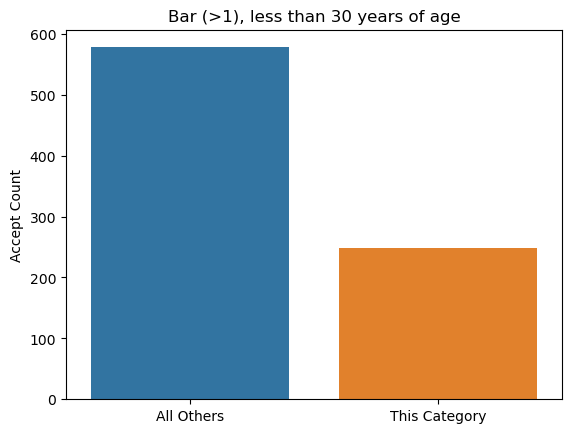

In [285]:
drawBarPlot(data_bar_accept.below30MoreOnce, ['All Others', 'This Category'], "Accept Count", \
            "Bar (>1), less than 30 years of age")

In [288]:
# go to cheap restaurants more than 4 times a month and income is less than 50K.

data_bar_accept = data_bar_accept.assign(cheapRest4Income50k=np.where((\
                                (data_bar_accept['RestaurantLessThan20'].isin(['4~8', 'gt8'])) \
                                & (data_bar_accept['income_num'] < 50000)), 1, 0))

countZeroOneSeries(data_bar_accept['cheapRest4Income50k'], \
       "drivers visiting cheap restaurants more than 4 times earning less than 50K who accepted coupon",\
                  "all other drivers who accepted")

# the percentage above can be visualized in the bar plot

Number of drivers visiting cheap restaurants more than 4 times earning less than 50K who accepted coupon  -  108
Number of all other drivers who accepted  -  719
Percent - 13.059250302297462


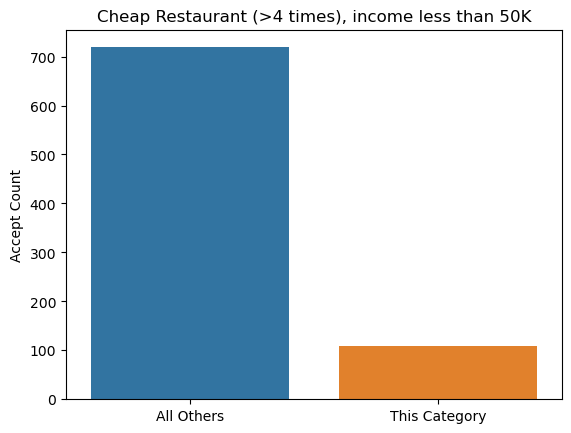

In [289]:
drawBarPlot(data_bar_accept.cheapRest4Income50k, ['All Others', 'This Category'], "Accept Count", \
            "Cheap Restaurant (>4 times), income less than 50K")

In [313]:
data_bar_accept = data_bar_accept.assign(olderThan25=np.where((\
                                (data_bar_accept['age_num'] > 25) \
                          ), 1, 0))

countZeroOneSeries(data_bar_accept['olderThan25'], \
       "drivers older than 25 who accepted coupon",\
                  "all other drivers who accepted")

Number of drivers older than 25 who accepted coupon  -  580
Number of all other drivers who accepted  -  247
Percent - 70.13301088270859


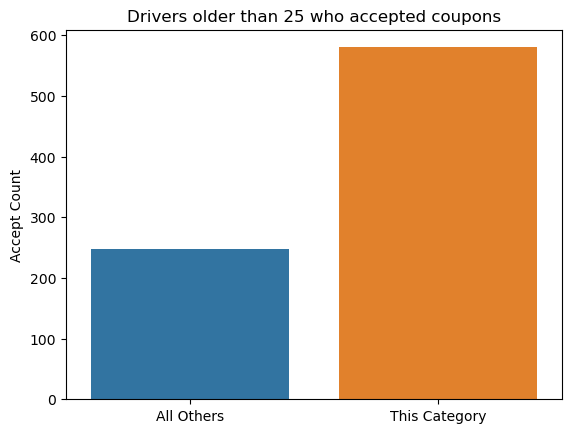

In [314]:
drawBarPlot(data_bar_accept.olderThan25, ['All Others', 'This Category'], "Accept Count", \
            "Drivers older than 25 who accepted coupons")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Drivers who accepted the bar coupons are:

1. Are highly likely to have visited a bar less than 3 times
2. Are very likely to be older than 25
3. Are half as likely to be someone who is not a widower and doesn't have a kid in the car
4. Less likely to be older than 30 years and goes to bar more than once a month
5. Very less likely to be one who visits cheap restaurants more than 4 times a month and makes less than 50K
6. Unlikely to be a farm worker with no kid in the car

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigate Cheap Restaurants (Restaurant(<20))

In [332]:
# We will create a new data frame with just cheap rest coupons

dat_res20 = data[data['coupon'] == 'Restaurant(<20)']

# let check how many accepted cheap restaurant coupons
dat_res20['Y'].value_counts()

1    1970
0     816
Name: Y, dtype: int64

In [375]:
dat_res20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 12677
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1970 non-null   object
 1   passanger             1970 non-null   object
 2   weather               1970 non-null   object
 3   temperature           1970 non-null   int64 
 4   time                  1970 non-null   object
 5   coupon                1970 non-null   object
 6   expiration            1970 non-null   object
 7   gender                1970 non-null   object
 8   age                   1970 non-null   object
 9   maritalStatus         1970 non-null   object
 10  has_children          1970 non-null   int64 
 11  education             1970 non-null   object
 12  occupation            1970 non-null   object
 13  income                1970 non-null   object
 14  car                   18 non-null     object
 15  Bar                   1955 non-null  

<Axes: >

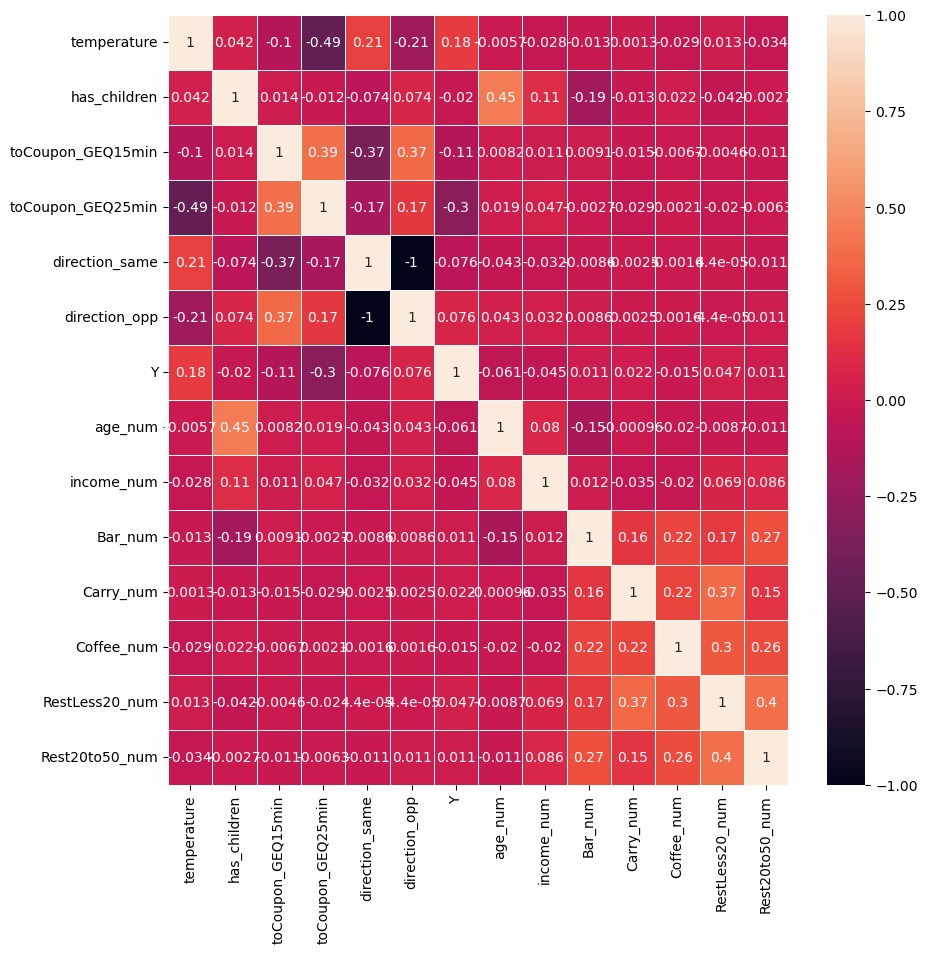

In [334]:
# Will see if there are any obvious correlations

heatmap_df = dat_res20[['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y', 'age_num', 'income_num', 'Bar_num', 'Carry_num', 'Coffee_num', 'RestLess20_num', 'Rest20to50_num']]
ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(heatmap_df.corr(), annot=True, linewidths=.5)


Based on the above heat map the only correlations that are not negligible are the ones to the 15 and 25 minutes distance features (negative) and temperature (positive). All the other correlations are fairly close to zero.

In [335]:
# Since we are going to study accepted coupons, create a data frame with just accepted cheap restaurant coupons 

dat_res20 = dat_res20[dat_res20['Y']==1]

dat_res20['Y'].value_counts()

1    1970
Name: Y, dtype: int64

## User Attributes

Let's start with user features and then move on to contextual 

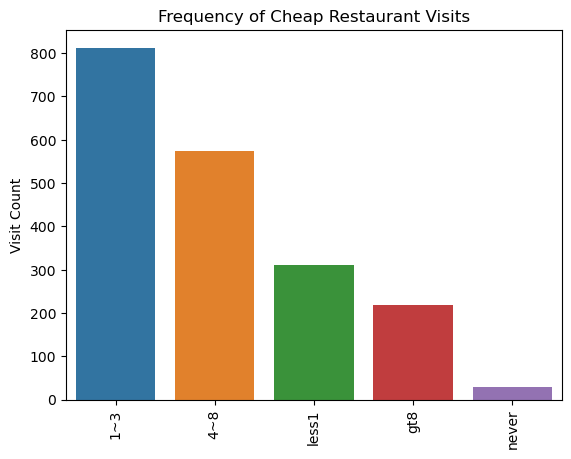

In [336]:
# Now let's see how the restaurant visitation of people who accepted the coupons are

valueCountBarPlot(dat_res20.RestaurantLessThan20, "Visit Count", "Frequency of Cheap Restaurant Visits")

In [337]:
# Its clear from the above graph that a driver accepting a coupon is likely to have visited restaurants at least once

dat_res20 = dat_res20.assign(resMore1=np.where(dat_res20['RestaurantLessThan20'].isin(['1~3', '4~8', \
                                            'gt8']), 1, 0))

countZeroOneSeries(dat_res20['resMore1'], \
       "drivers who visited restaurant at least once who accepted coupon",\
                  "all other drivers who accepted")


Number of drivers who visited restaurant at least once who accepted coupon  -  1606
Number of all other drivers who accepted  -  364
Percent - 81.5228426395939


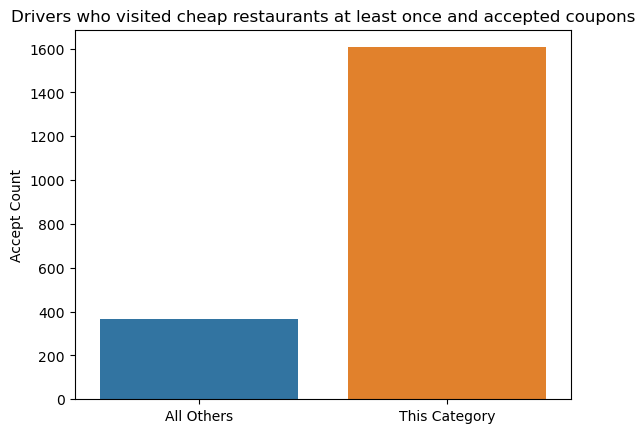

In [338]:
drawBarPlot(dat_res20.resMore1, ['All Others', 'This Category'], "Accept Count", \
            "Drivers who visited cheap restaurants at least once and accepted coupons")

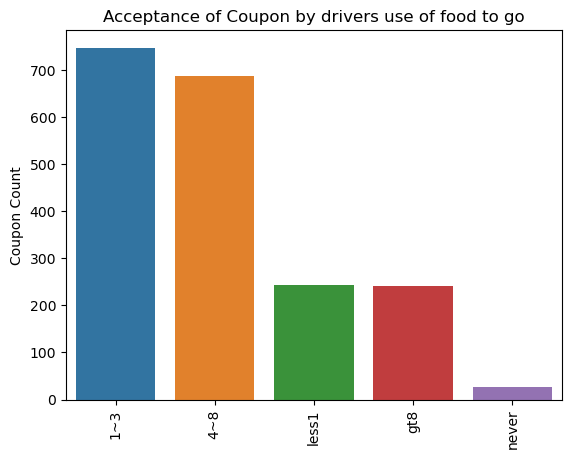

In [366]:
# Since taking out food is an alternate to going to restaurants, let's analyze that feature

valueCountBarPlot(dat_res20.CarryAway, "Coupon Count", "Acceptance of Coupon by drivers use of food to go")

 The carry out acceptance rate very closely matches the restaurant visit rate - drivers who did at least one carry
 carry out order per month are more likely to accept the coupon

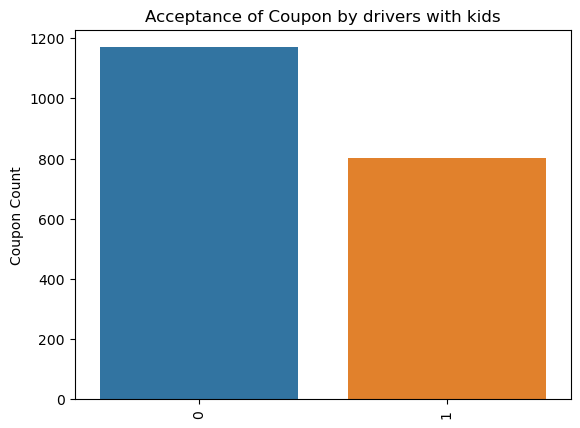

In [348]:
# One would expect kids in the family and drivers with kids in the car to impact acceptance.

valueCountBarPlot(dat_res20.has_children, "Coupon Count", "Acceptance of Coupon by drivers with kids")

Kids in family don't appear to have a significant impact on acceptance.

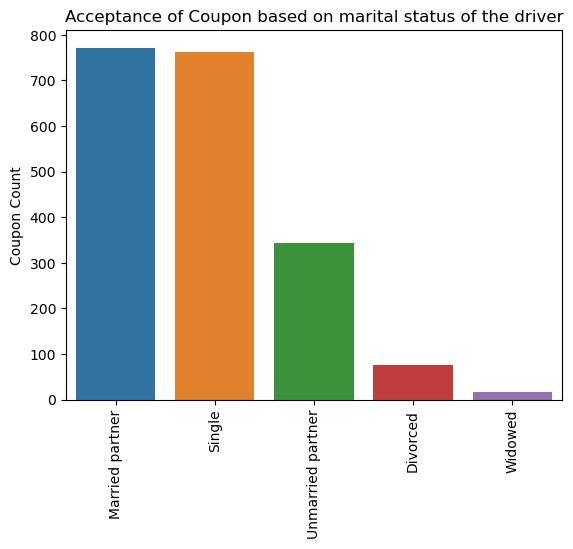

In [350]:
# Let's see if Marital Status of the driver has an impact on acceptance

valueCountBarPlot(dat_res20.maritalStatus, "Coupon Count", \
                  "Acceptance of Coupon based on marital status of the driver")

In [362]:
# This tells us that drivers who are not divorced or widowed have a great probability of acceptance


dat_res20 = dat_res20.assign(notDivorceWidow=np.where(dat_res20['maritalStatus'].isin(['Married partner', 'Single', \
                                            'Unmarried partner']), 1, 0))

countZeroOneSeries(dat_res20['notDivorceWidow'], \
       "drivers who are not widowed or divorced who accepted coupon",\
                  "all other drivers who accepted")


Number of drivers who are not widowed or divorced who accepted coupon  -  1878
Number of all other drivers who accepted  -  92
Percent - 95.32994923857868


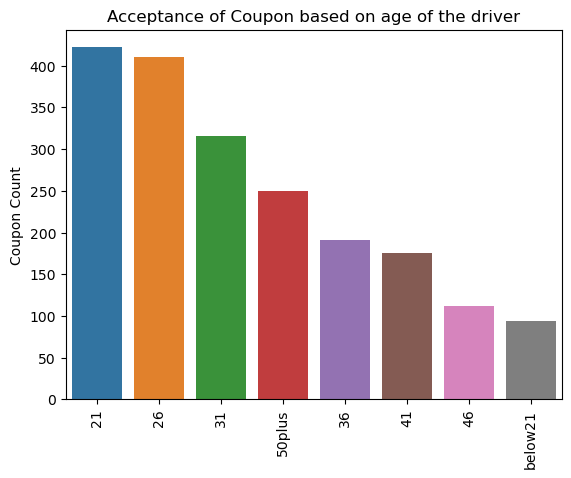

In [360]:
# How about coupon acceptance on age?

valueCountBarPlot(dat_res20.age, "Coupon Count", \
                  "Acceptance of Coupon based on age of the driver")

In [365]:
# From the bars above it does appear that drivers aged 35 and under are more likely to accept the coupon.
# Let us analyze this further

dat_res20 = dat_res20.assign(less40Age=np.where(dat_res20['age_num'] < 40, 1, 0))

countZeroOneSeries(dat_res20['less35Age'], \
       "drivers younger than 40 who accepted coupon",\
                  "all other drivers who accepted")


Number of drivers younger than 35 who accepted coupon  -  1433
Number of all other drivers who accepted  -  537
Percent - 72.74111675126903


Drivers younger 40 are more likely to accept the coupon

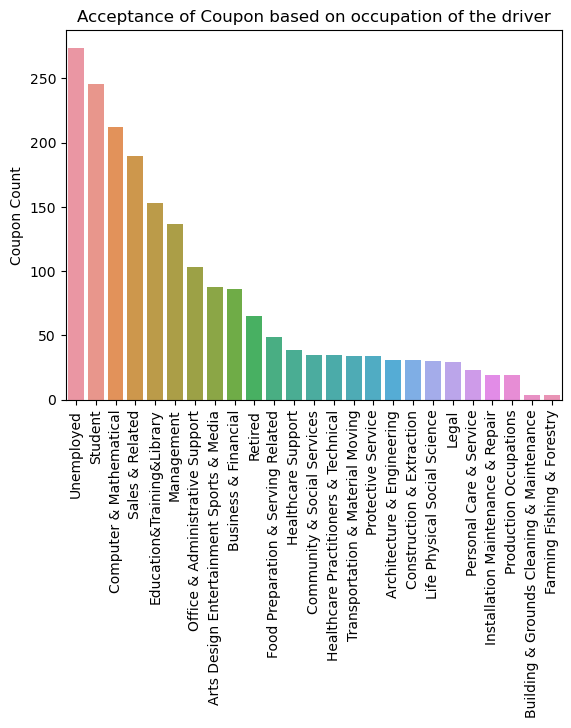

In [353]:
# As the last set of user attributes to analyze, let's see if occupation and income influence acceptance

# Occupation

valueCountBarPlot(dat_res20.occupation, "Coupon Count", \
                  "Acceptance of Coupon based on occupation of the driver")

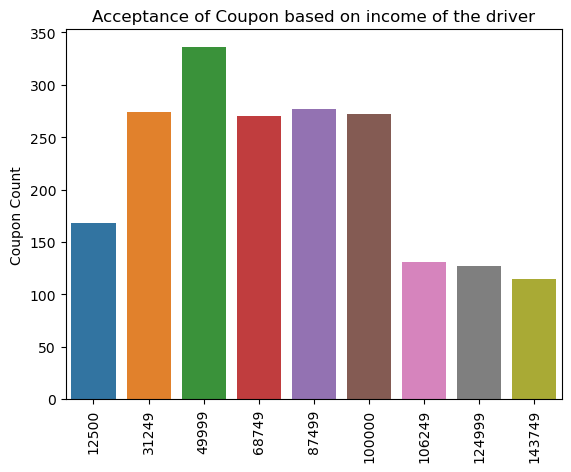

In [354]:
# It is interesting to observe that Unemployed and Students whose income is expected to be low accept coupons the most
# Also drivers with Framing and Maintenance as occupation are least likely to accept coupons (same as we saw with bar)

# Let now check out income

valueCountBarPlot(dat_res20.income_num, "Coupon Count", \
                  "Acceptance of Coupon based on income of the driver")

In [ ]:
# There doesn't appear to be strong relationship between income and coupon acceptance

## Contextual Attributes

Now let's look at contextual attributes

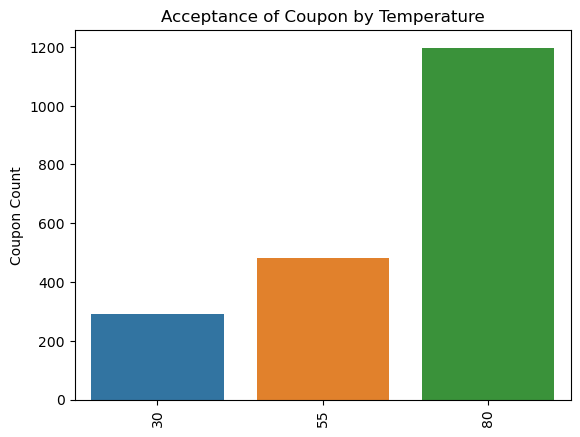

In [343]:
# Let's see if temperature and weather influences coupon acceptors 

valueCountBarPlot(dat_res20.temperature, "Coupon Count", "Acceptance of Coupon by Temperature")

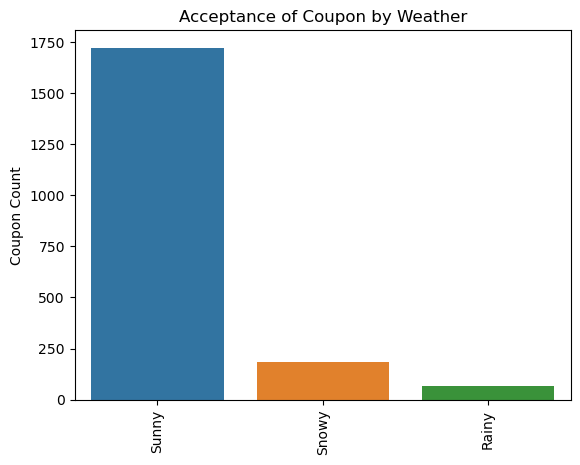

In [345]:
# If temperature had an impact on coupon acceptance, wouldn't weather?

valueCountBarPlot(dat_res20.weather, "Coupon Count", "Acceptance of Coupon by Weather")

In [346]:
# Indeed - very few drivers accept coupons when the weather is cold. Let us now combine warmer temperature and
# sunny weahter


dat_res20 = dat_res20.assign(notCold=np.where((dat_res20['temperature'] >= 55) \
                          & (dat_res20['weather'] == 'Sunny'), 1, 0))

countZeroOneSeries(dat_res20['notCold'], \
       "drivers accepted the coupon when the temperature was not cold",\
                  "all other drivers who accepted")

Number of drivers accepted the coupon when the temperature was not cold  -  1614
Number of all other drivers who accepted  -  356
Percent - 81.92893401015229


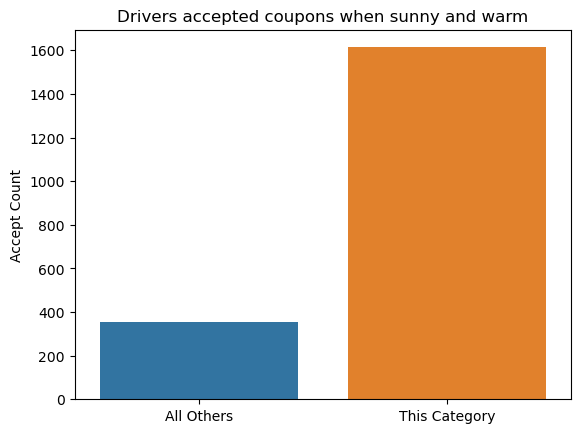

In [347]:
drawBarPlot(dat_res20.notCold, ['All Others', 'This Category'], "Accept Count", \
            "Drivers accepted coupons when sunny and warm")

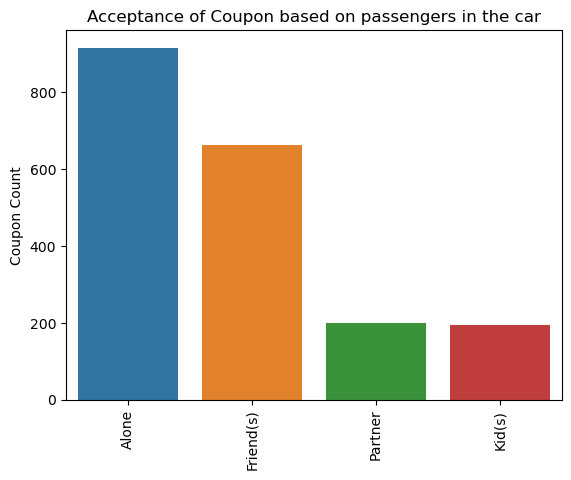

In [349]:
# Let's now look at kids in the car?

valueCountBarPlot(dat_res20.passanger, "Coupon Count", "Acceptance of Coupon based on passengers in the car")

In [351]:
# Interestingly not having kids in the car is a big factor for acceptance!

dat_res20 = dat_res20.assign(noKidPassengers=np.where(dat_res20['passanger'] != 'Kid(s)', 1, 0))

countZeroOneSeries(dat_res20['noKidPassengers'], \
       "drivers with no kid passengers who accepted coupons",\
                  "all other drivers who accepted")


Number of drivers with no kid passengers who accepted coupons  -  1777
Number of all other drivers who accepted  -  193
Percent - 90.20304568527919


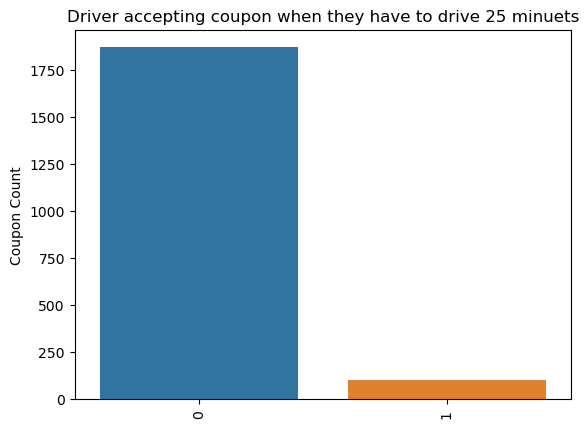

In [356]:
# As the last set of contextual attributes, let us investigate the negative correlation we saw with the distance
# features

valueCountBarPlot(dat_res20.toCoupon_GEQ25min, "Coupon Count", \
                  "Driver accepting coupon when they have to drive 25 minuets")

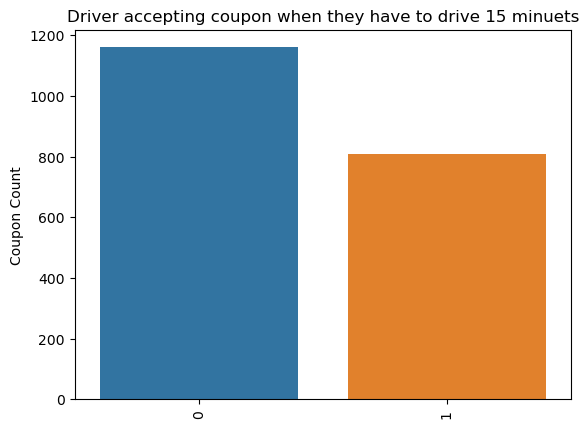

In [357]:
# A very small number of drivers who had to drive 25 minutes accepted the coupon

# Let's now check 15 minutes

valueCountBarPlot(dat_res20.toCoupon_GEQ15min, "Coupon Count", \
                  "Driver accepting coupon when they have to drive 15 minuets")

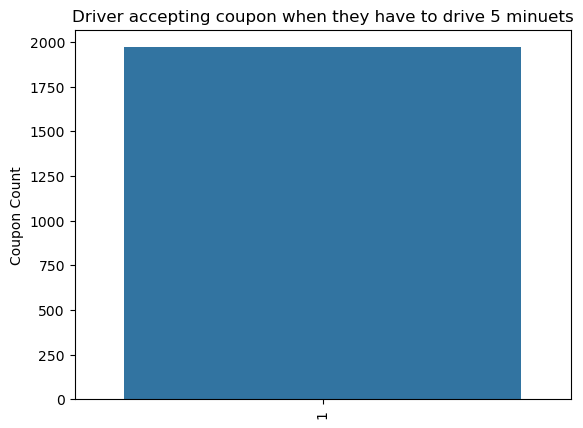

In [359]:
# Driving 15 minutes seems acceptable to a lot more drivers

# It will be interesting to see the numbers for 5 minutes

valueCountBarPlot(dat_res20.toCoupon_GEQ5min, "Coupon Count", \
                  "Driver accepting coupon when they have to drive 5 minuets")

In [ ]:
# Everyone who accepted the coupon drove for 5 minutes!

## Inferences on drivers who accepted coupons

Using the analysis above, the inferences below can be drawn.

Drivers have high chances of accepting a cheap restaurant coupon when:

1. They have visited cheap restaurants or carried out food at least once
2. Are not divorced or widowed
3. Are under 40 years of age
4. Are driving when it's warm and sunny
5. Are driving without kids

## Inferences on drivers who are unlikely to accept coupons

While this can arguably the converse of the above inferences on acceptance, listing the most impactful ones here:

1. Drivers who are divorced or widowed
2. Drivers who are driving in cold temperatures or rainy/snowy weather
3. Driving with a kid or partner